In [1]:
import keras
keras.__version__

'2.9.0'

# The most simple Neural Networks 

## Regression Problem


### Linear regression 

reduces to linear function of one variable and no activation - just linear output. Formally it is not a real neural network, because it doesn't contain any non linear activations.

Linear regression in Keras primitives
$$y(x)=wx+b$$

#### Generate dataset

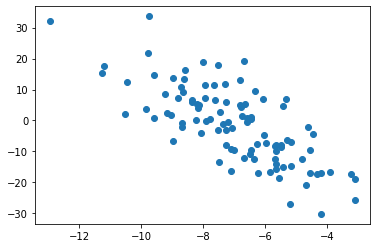

In [2]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=8)
X += -3*X - 7
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

#### Define Model

In [3]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(1, activation='linear',input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
import tensorflow as tf
model.compile(loss='mae',

             optimizer=tf.optimizers.Adam(learning_rate=0.5),
             metrics=['mae','mse'])

#### Train Paramemters

In [5]:
history = model.fit(
      X,
      y,
      epochs=300,
      verbose=0)

#### Visualize Result

4/4 [==============================] - 0s 4ms/step


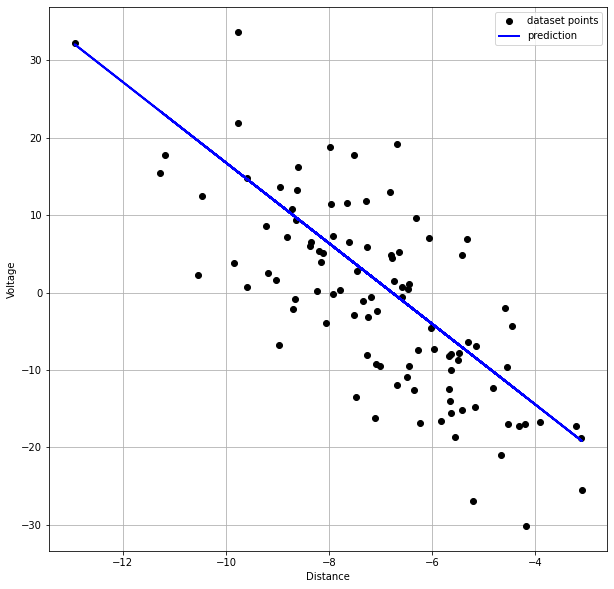

In [6]:
import numpy as np
from matplotlib import pyplot as plt

x_p = np.linspace(X.min(),X.max(),1000)
y_p = model.predict((X))

fig, axes = plt.subplots(1)
fig.set_size_inches(10, 10) 

axes.plot(X, y,'o', label = 'dataset points', linewidth=2.0, c='black')
axes.plot(X, y_p, label = 'prediction', linewidth=2.0, c='blue')

axes.legend()
axes.grid()

axes.set_ylabel("Voltage")
axes.set_xlabel("Distance")

plt.show()

#### Training Curve

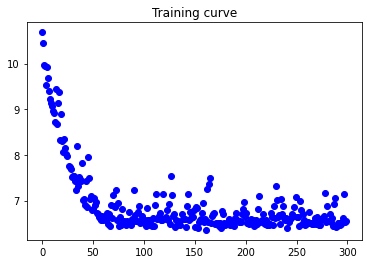

In [7]:
import matplotlib.pyplot as plt

mae = history.history['mae']

loss = history.history['loss']
epochs = range(len(mae))


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training curve')

plt.show()


### Non linear curve approximation for function of one variable

$$y=f(x)$$

#### Generate dataset

In [8]:
import numpy as np
transformation_map = [
                      [00.0, 0.03],
                      [00.8, 1.37],
                      [02.0, 2.22],
                      [02.5, 2.75],
                      [03.0, 3.05],
                      [03.5, 3.00],
                      [04.0, 2.73],
                      [05.0, 2.35],
                      [06.0, 2.01],
                      [07.0, 1.77],
                      [08.0, 1.56],
                      [09.0, 1.40],
                      [10.0, 1.28],
                      [12.0, 1.07],
                      [14.0, 0.93],
                      [16.0, 0.81],
                      [18.0, 0.72],
                      [20.0, 0.65],
                      [25.0, 0.53],
                      [30.0, 0.45],
                      [35.0, 0.37],
                      [40.0, 0.31],
                      ]
x = np.array([item[0] for item in transformation_map])
y = np.array([item[1] for item in transformation_map])

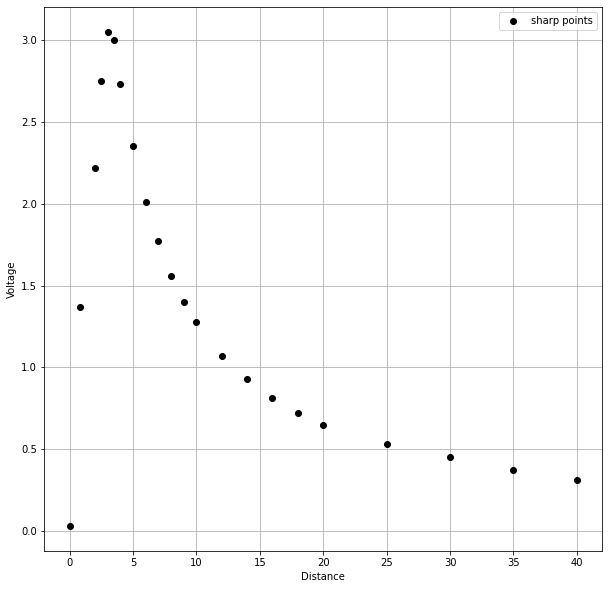

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1)
fig.set_size_inches(10, 10)

axes.plot(x, y,'o', label = 'sharp points', linewidth=2.0, c='black')

axes.legend()
axes.grid()

axes.set_ylabel("Voltage")
axes.set_xlabel("Distance")

plt.show()

#### Define Model

In [10]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(8, activation='tanh',input_shape=(1,)))
model.add(layers.Dense(4, activation='tanh',))

# model.add(layers.Dense(8, activation='sigmoid',input_shape=(1,)))
# model.add(layers.Dense(4, activation='sigmoid',))

model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [11]:
import tensorflow as tf
model.compile(loss='mse',

             optimizer=tf.optimizers.Adam(learning_rate=1e-2),
             metrics=['mae','mse'])

#### Train Paramemters

In [12]:
history = model.fit(
      x,
      y,
      epochs=900,
      verbose=0)

#### Visualize Result

32/32 [==============================] - 0s 2ms/step


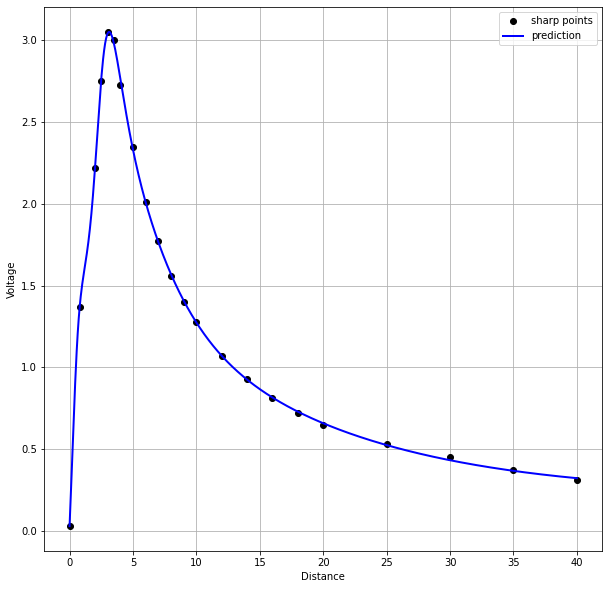

In [13]:
x_p = np.linspace(0,40,1000)
y_p = model.predict((x_p))

fig, axes = plt.subplots(1)
fig.set_size_inches(10, 10) 

axes.plot(x, y,'o', label = 'sharp points', linewidth=2.0, c='black')
axes.plot(x_p, y_p, label = 'prediction', linewidth=2.0, c='blue')

axes.legend()
axes.grid()

axes.set_ylabel("Voltage")
axes.set_xlabel("Distance")

plt.show()

#### Training Curve

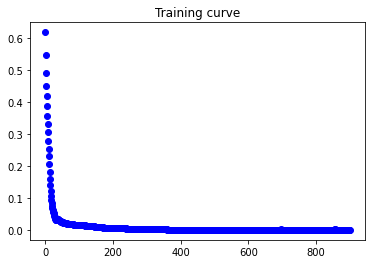

In [14]:
import matplotlib.pyplot as plt

mae = history.history['mae']

loss = history.history['loss']
epochs = range(len(mae))


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training curve')

plt.show()

## Classification Problem (Binary Classification)

A simple Neural Networks for classification
Items of two features X0 X1 and binary class y

### The most simple NN for classification is logistic regression
Logistic regression is a neural network with one neuron with sigmoid activation

#### Generate Dataset

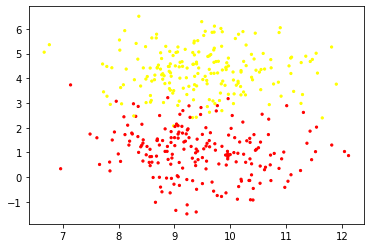

In [15]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np


X, y = make_blobs(n_samples=500, centers=2, n_features=2,random_state=4)
# X, y = make_moons(n_samples=1250, noise=0.17)

# encoder = LabelEncoder()
# encoder.fit(y)
# # y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=5, cmap='winter')

#### Define Model

In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid',input_shape=(2,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
#lr_schedule = schedules.ExponentialDecay(
#    initial_learning_rate=0.1,
#    decay_steps=10,
#    decay_rate=0.9)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(
              #learning_rate=lr_schedule,
              learning_rate=1e-2),
              metrics=['acc'])

#### Train Paramemters

In [18]:
history = model.fit(
      X_train,
      y_train,
      #batch_size=10,
      epochs=100,
      validation_split=0.2,
      verbose=0)

#### Visualize Result

248/248 [==============================] - 0s 1ms/step


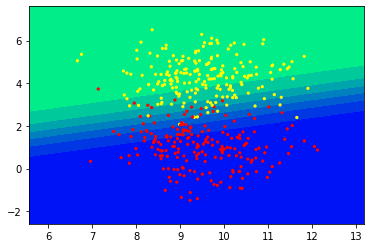

In [19]:
min1, max1 = (X_train[:,0].min()-1.1, X_train[:,0].max()+1.1)
min2, max2 = (X_train[:,1].min()-1.1, X_train[:,1].max()+1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='winter')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')

#### Training Curve

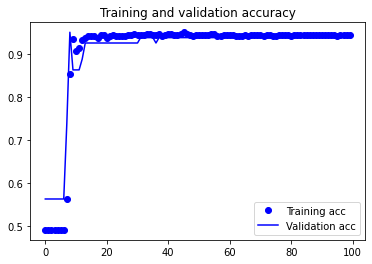

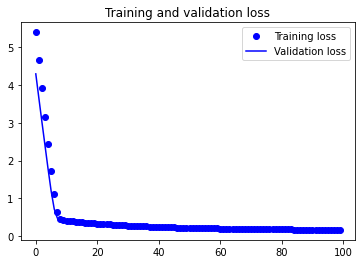

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### More complex NN
Multi Layered Perception

#### Generate Dataset

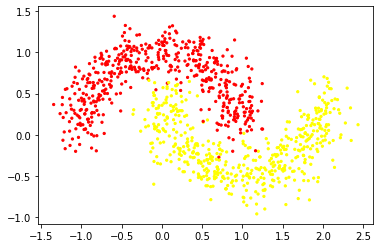

In [21]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np


# X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=4)
X, y = make_moons(n_samples=1250, noise=0.17)

# encoder = LabelEncoder()
# encoder.fit(y)
# # y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=5, cmap='winter')

#### Just a logistic regression (linear decision boundary)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
36/36 [==============================] - 0s 1ms/step
[[0.98849505]
 [0.9898169 ]
 [0.9909883 ]
 ...
 [0.01222557]
 [0.01380889]
 [0.01559404]]


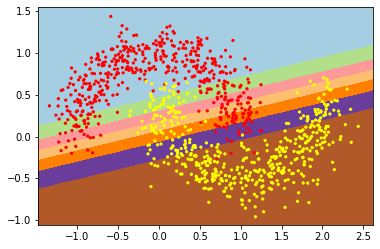

In [22]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid',input_shape=(2,)))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(
              #learning_rate=lr_schedule,
              learning_rate=1e-2),
              metrics=['acc'])

history = model.fit(
      X_train,
      y_train,
      #batch_size=10,
      epochs=100,
      validation_split=0.2,
      verbose=0)

min1, max1 = (X_train[:,0].min()*1.1, X_train[:,0].max()*1.1)
min2, max2 = (X_train[:,1].min()*1.1, X_train[:,1].max()*1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
print(yhat)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')

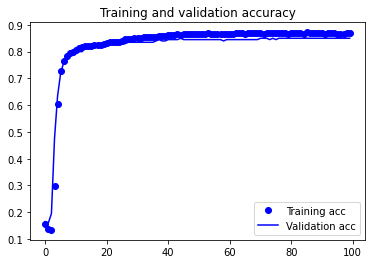

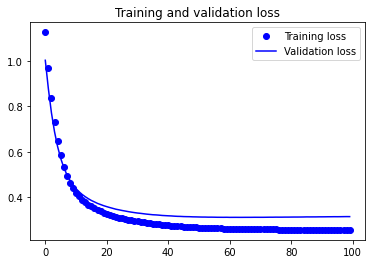

In [23]:
# import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### More powerfull non-linerar classifier

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(1000, 2)

In [26]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import schedules
# lr_schedule = schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=200,
#     decay_rate=0.8)

# model.compile(loss='mse',

#              optimizer=tf.optimizers.Adam(learning_rate=lr_schedule),
#              metrics=['mae','mse'])

#### Define Model

In [27]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(8, activation='relu',input_shape=(2,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr_schedule),
              metrics=['acc'])

#### Train Paramemters

In [29]:
history = model.fit(
      X_train,
      y_train,
      batch_size=10,
      epochs=12,
      validation_split=0.2,
      verbose=0)

#### Visualize Result

75/75 [==============================] - 0s 2ms/step
[[3.2895882e-04]
 [1.1292449e-03]
 [2.8234960e-03]
 ...
 [9.8998952e-01]
 [9.9687153e-01]
 [9.9886972e-01]]


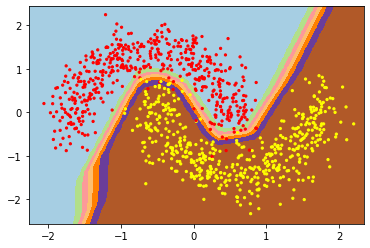

In [30]:
min1, max1 = (X_train[:,0].min()*1.1, X_train[:,0].max()*1.1)
min2, max2 = (X_train[:,1].min()*1.1, X_train[:,1].max()*1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
print(yhat)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')

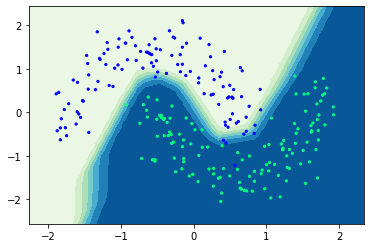

In [31]:
plt.contourf(xx, yy, zz, cmap='GnBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=5, cmap='winter')

#### Training Curve

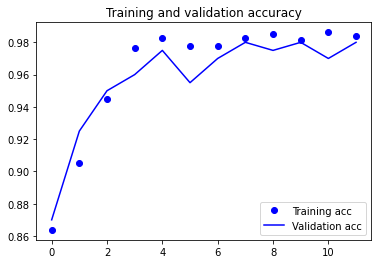

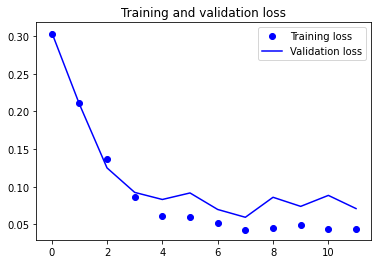

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification Problem (Multiclass Classification)

### Simple Softmax

#### Generate dataset

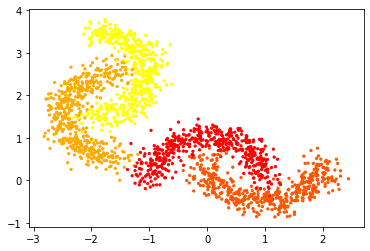

In [33]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np


# X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=4)
X, y = make_moons(n_samples=1250, noise=0.17)
X1, y1 = make_moons(n_samples=1250, noise=0.17)
X1 = X1 + 1.5

theta = np.pi/2

rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])

X1 = np.dot(X1, rotMatrix.T)

y1 += 2

X = np.append(X, X1, axis=0)
y = np.append(y, y1, axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=5, cmap='winter')

#### Define Model

In [34]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(4, activation='softmax',input_shape=(2,)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr_schedule),
              metrics=['acc'])


#### Train Paramemters

In [36]:
history = model.fit(
      X_train,
      y_train,
      batch_size=10,
      epochs=20,
      validation_split=0.2,
      verbose=1)

Epoch 1/20
160/160 [==============================] - 1s 4ms/step - loss: 1.3241 - acc: 0.3725 - val_loss: 0.9062 - val_acc: 0.6950
Epoch 2/20
160/160 [==============================] - 0s 3ms/step - loss: 0.7429 - acc: 0.7919 - val_loss: 0.6845 - val_acc: 0.7900
Epoch 3/20
160/160 [==============================] - 0s 3ms/step - loss: 0.5989 - acc: 0.8138 - val_loss: 0.6009 - val_acc: 0.7950
Epoch 4/20
160/160 [==============================] - 0s 3ms/step - loss: 0.5276 - acc: 0.8194 - val_loss: 0.5448 - val_acc: 0.8050
Epoch 5/20
160/160 [==============================] - 0s 3ms/step - loss: 0.4851 - acc: 0.8300 - val_loss: 0.5062 - val_acc: 0.8150
Epoch 6/20
160/160 [==============================] - 0s 3ms/step - loss: 0.4558 - acc: 0.8394 - val_loss: 0.4880 - val_acc: 0.8150
Epoch 7/20
160/160 [==============================] - 0s 3ms/step - loss: 0.4326 - acc: 0.8425 - val_loss: 0.4744 - val_acc: 0.8225
Epoch 8/20
160/160 [==============================] - 0s 3ms/step - loss: 0.

#### Visualize Result

95/95 [==============================] - 0s 2ms/step


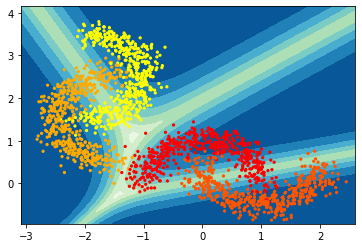

In [37]:
min1, max1 = (X_train[:,0].min()*1.1, X_train[:,0].max()*1.1)
min2, max2 = (X_train[:,1].min()*1.1, X_train[:,1].max()*1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
yhat = np.max(yhat, axis=1)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface

plt.contourf(xx, yy, zz, cmap='GnBu')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')

#### Training Curve

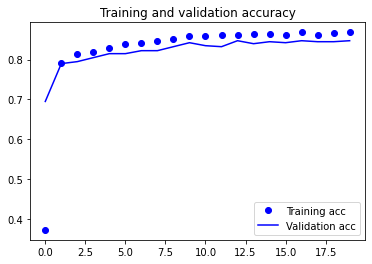

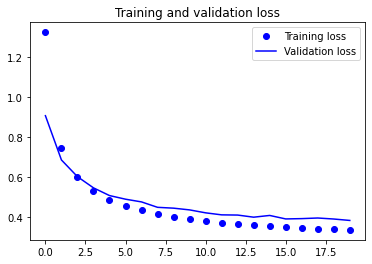

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Deeper neural network

#### Re-use dataset

We use the same dataset from previous section

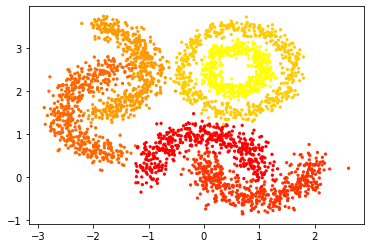

In [39]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np


# X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=4)
X, y = make_moons(n_samples=1250, noise=0.17)
X1, y1 = make_moons(n_samples=1250, noise=0.17)
X1 = X1 + 1.5

theta = np.pi/2

rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])

X1 = np.dot(X1, rotMatrix.T)

y1 += 2

X2, y2 = make_circles(n_samples=1250,factor=0.5,noise=0.1)

# X2 = X2*3.4

X2[:,1] += 2.5
X2[:,0] += 0.6

y2[:] += 4

X = np.append(X, X1, axis=0)
y = np.append(y, y1, axis=0)

X = np.append(X, X2, axis=0)
y = np.append(y, y2, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=5, cmap='winter')

#### Define a model of too linear classifier to fit data well (bias)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
240/240 [==============================] - 1s 3ms/step - loss: 1.3162 - acc: 0.4212 - val_loss: 0.9701 - val_acc: 0.6017
Epoch 2/20
240/240 [==============================] - 1s 2ms/step - loss: 0.8725 - acc: 0.6300 - val_loss: 0.7925 - val_acc: 0.6550
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.7508 - acc: 0.6712 - val_loss: 0.7096 - val_acc: 0.6933
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.6919 - acc: 0.6712 - val_loss: 0.6582 - val_acc: 0.6933
Epoch 5/20
240/240 [==============================] - 1s 3

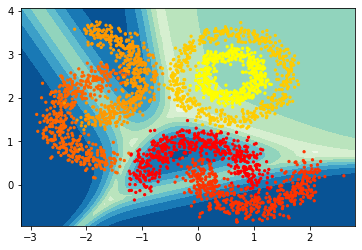

In [40]:
model = models.Sequential()
model.add(layers.Dense(6, activation='softmax',input_shape=(2,)))
model.summary()

lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr_schedule),
              metrics=['acc'])

history = model.fit(
      X_train,
      y_train,
      batch_size=10,
      epochs=20,
      validation_split=0.2,
      verbose=1)

min1, max1 = (X_train[:,0].min()*1.1, X_train[:,0].max()*1.1)
min2, max2 = (X_train[:,1].min()*1.1, X_train[:,1].max()*1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
yhat = np.max(yhat, axis=1)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface

plt.contourf(xx, yy, zz, cmap='GnBu')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='autumn')

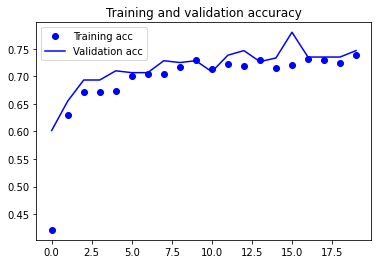

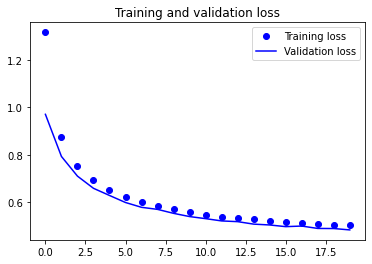

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Define a better Model

In [42]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                48        
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 6)                 102       
                                                                 
Total params: 422
Trainable params: 422
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr_schedule),
              metrics=['acc'])

#### Train Paramemters

In [44]:
history = model.fit(
      X_train,
      y_train,
      batch_size=10,
      epochs=20,
      validation_split=0.2,
      verbose=1)

Epoch 1/20
240/240 [==============================] - 1s 3ms/step - loss: 0.6903 - acc: 0.6975 - val_loss: 0.3780 - val_acc: 0.8333
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3767 - acc: 0.8267 - val_loss: 0.3091 - val_acc: 0.8900
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3224 - acc: 0.8654 - val_loss: 0.2627 - val_acc: 0.8867
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2459 - acc: 0.9038 - val_loss: 0.1669 - val_acc: 0.9733
Epoch 5/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1851 - acc: 0.9279 - val_loss: 0.1175 - val_acc: 0.9617
Epoch 6/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1414 - acc: 0.9508 - val_loss: 0.1141 - val_acc: 0.9650
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1148 - acc: 0.9550 - val_loss: 0.0808 - val_acc: 0.9783
Epoch 8/20
240/240 [==============================] - 1s 3ms/step - loss: 0.

#### Visualize Result

98/98 [==============================] - 0s 1ms/step


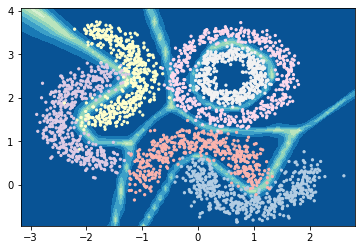

In [45]:
min1, max1 = (X_train[:,0].min()*1.1, X_train[:,0].max()*1.1)
min2, max2 = (X_train[:,1].min()*1.1, X_train[:,1].max()*1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
yhat = np.max(yhat, axis=1)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface

plt.contourf(xx, yy, zz, cmap='GnBu')

# plt.contourf(xx, yy, zz, cmap='cubehelix')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, cmap='Pastel1')

#### Training Curve

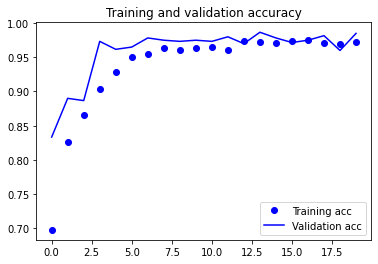

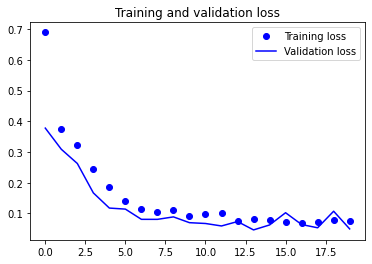

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()